In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error,r2_score



In [2]:
df=pd.read_csv('/content/bitcoin_dataset.csv')
df.head()

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2/17/2010,0.0,2043200.0,0.0,0.0,0.0,0.000235,0,1.0,0.0,...,31.781022,0.0,241,244,41240,244,244,65173.13,36500.0,0.0
1,2/18/2010,0.0,2054650.0,0.0,0.0,0.0,0.000241,0,1.0,0.0,...,154.463801,0.0,234,235,41475,235,235,18911.74,7413.0,0.0
2,2/19/2010,0.0,2063600.0,0.0,0.0,0.0,0.000228,0,1.0,0.0,...,1278.516635,0.0,185,183,41658,183,183,9749.98,700.0,0.0
3,2/20/2010,0.0,2074700.0,0.0,0.0,0.0,0.000218,0,1.0,0.0,...,22186.687990,0.0,224,224,41882,224,224,11150.03,50.0,0.0
4,2/21/2010,0.0,2085400.0,0.0,0.0,0.0,0.000234,0,1.0,0.0,...,689.179876,0.0,218,218,42100,218,218,12266.83,1553.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Date                                                 2906 non-null   object 
 1   btc_market_price                                     2906 non-null   float64
 2   btc_total_bitcoins                                   2879 non-null   float64
 3   btc_market_cap                                       2906 non-null   float64
 4   btc_trade_volume                                     2885 non-null   float64
 5   btc_blocks_size                                      2877 non-null   float64
 6   btc_avg_block_size                                   2906 non-null   float64
 7   btc_n_orphaned_blocks                                2906 non-null   int64  
 8   btc_n_transactions_per_block                         2906 non-null  

In [4]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract numerical features from 'Date'
df['Date_year'] = df['Date'].dt.year
df['Date_month'] = df['Date'].dt.month
df['Date_day'] = df['Date'].dt.day

In [5]:
# Drop the original 'Date' column
df.drop('Date', axis=1,inplace=True)

In [6]:
for i in df:
  print(i)
  print(df[i].dtype)

btc_market_price
float64
btc_total_bitcoins
float64
btc_market_cap
float64
btc_trade_volume
float64
btc_blocks_size
float64
btc_avg_block_size
float64
btc_n_orphaned_blocks
int64
btc_n_transactions_per_block
float64
btc_median_confirmation_time
float64
btc_hash_rate
float64
btc_difficulty
float64
btc_miners_revenue
float64
btc_transaction_fees
float64
btc_cost_per_transaction_percent
float64
btc_cost_per_transaction
float64
btc_n_unique_addresses
int64
btc_n_transactions
int64
btc_n_transactions_total
int64
btc_n_transactions_excluding_popular
int64
btc_n_transactions_excluding_chains_longer_than_100
int64
btc_output_volume
float64
btc_estimated_transaction_volume
float64
btc_estimated_transaction_volume_usd
float64
Date_year
int32
Date_month
int32
Date_day
int32


In [7]:
df.isnull().sum()

,0
btc_market_price,0
btc_total_bitcoins,27
btc_market_cap,0
btc_trade_volume,21
btc_blocks_size,29
btc_avg_block_size,0
btc_n_orphaned_blocks,0
btc_n_transactions_per_block,0
btc_median_confirmation_time,12
btc_hash_rate,0


In [8]:
for i in df:
  print(df[i].unique())

[0.00000000e+00 7.69000000e-02 7.40000000e-02 ... 1.12126550e+04
 1.01840617e+04 1.01250133e+04]
[ 2043200.   2054650.   2063600.  ... 16834137.5 16836225.  16837687.5]
[0.00000000e+00 2.87932825e+05 2.77566600e+05 ... 1.90000000e+11
 1.98000000e+11 1.71000000e+11]
[0.00000000e+00 1.00000000e+00 5.25070000e+00 ... 6.11119735e+08
 1.26628412e+09 9.33239778e+08]
[0.00000000e+00            nan 1.00000000e+00 ... 1.54157665e+05
 1.54322579e+05 1.54444590e+05]
[2.34776000e-04 2.40913000e-04 2.27749000e-04 ... 1.01817389e+00
 9.87508671e-01 1.04283132e+00]
[0 1 3 2 4 5 7]
[1.00000000e+00 5.00000000e+00 1.00000000e+01 ... 1.56875676e+03
 1.41682036e+03 1.74594872e+03]
[ 0.         11.06666667 12.78333333 16.01666667 13.36666667 15.18333333
 14.         14.01666667 10.26666667 14.03333333 13.25       10.63333333
 15.61666667 17.05       15.93333333 12.01666667 13.18333333  9.23333333
 16.03333333 14.9        12.925      14.6        13.23333333 15.36666667
 13.03333333 12.53333333 13.83333333 1

In [9]:
# compute median for replace with null
median_total_bitcoins=df['btc_total_bitcoins'].median()
median_trade_volume=df['btc_trade_volume'].median()
median_blocks_size=df['btc_blocks_size'].median()
median_confirmation_time=df['btc_median_confirmation_time'].median()
median_difficulty=df['btc_difficulty'].median()
median_transaction_fees=df['btc_transaction_fees'].median()

print('median_total_bitcoins',median_total_bitcoins)
print('median_trade_volume',median_trade_volume)
print('median_blocks_size',median_blocks_size)
print('median_confirmation_time',median_confirmation_time)
print('median_difficulty',median_difficulty)
print('median_transaction_fees',median_transaction_fees)


df['btc_total_bitcoins']=df['btc_total_bitcoins'].fillna(median_total_bitcoins)
df['btc_trade_volume']=df['btc_trade_volume'].fillna(median_trade_volume)
df['btc_blocks_size']=df['btc_blocks_size'].fillna(median_blocks_size)
df['btc_median_confirmation_time']=df['btc_median_confirmation_time'].fillna(median_confirmation_time)
df['btc_difficulty']=df['btc_difficulty'].fillna(median_difficulty)
df['btc_transaction_fees']=df['btc_transaction_fees'].fillna(median_transaction_fees)


median_total_bitcoins 12431150.0
median_trade_volume 10014137.5
median_blocks_size 15183.0
median_confirmation_time 7.916666667
median_difficulty 2193847870.0
median_transaction_fees 20.41519416


In [10]:
df.isnull().sum()

,0
btc_market_price,0
btc_total_bitcoins,0
btc_market_cap,0
btc_trade_volume,0
btc_blocks_size,0
btc_avg_block_size,0
btc_n_orphaned_blocks,0
btc_n_transactions_per_block,0
btc_median_confirmation_time,0
btc_hash_rate,0


In [11]:
'''df['btc_blocks_size'].replace('<',np.nan,inplace=True)
df['btc_difficulty'].replace('<',np.nan,inplace=True)
df['btc_transaction_fees'].replace('<',np.nan,inplace=True)'''

"df['btc_blocks_size'].replace('<',np.nan,inplace=True)\ndf['btc_difficulty'].replace('<',np.nan,inplace=True)\ndf['btc_transaction_fees'].replace('<',np.nan,inplace=True)"

In [12]:
'''df.isnull().sum()'''

'df.isnull().sum()'

In [13]:
# check duplicates
df.duplicated().sum()

0

In [14]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd,Date_year,Date_month,Date_day
count,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03,2906.000000,2906.000000,2906.000000,2906.000000,2906.000000,2.906000e+03,...,2906.000000,2.906000e+03,2906.000000,2906.000000,2.906000e+03,2.906000e+03,2.906000e+03,2906.000000,2906.000000,2906.000000
mean,839.104218,1.151992e+07,1.344352e+10,7.352154e+07,35302.697417,0.350366,0.364074,671.673651,7.502829,1.244070e+06,...,102081.138334,6.844558e+07,94348.852374,63140.320028,1.566216e+06,2.036475e+05,2.024338e+08,2013.604955,6.547832,15.769443
std,2304.972497,4.181392e+06,3.866841e+10,2.914143e+08,43447.369304,0.353168,0.842259,689.561322,4.964336,2.924141e+06,...,103896.929350,8.285341e+07,103966.111763,69687.052174,2.278910e+06,2.682781e+05,5.800513e+08,2.299329,3.442363,8.802744
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00,2010.000000,1.000000,1.000000
25%,6.653465,8.536962e+06,5.363081e+07,2.968431e+05,801.500000,0.024177,0.000000,54.000000,6.066667,1.160880e+01,...,8025.250000,2.413376e+06,6813.500000,6765.500000,4.901712e+05,9.600325e+04,9.581680e+05,2012.000000,4.000000,8.000000
50%,235.130000,1.243115e+07,3.346869e+09,1.001414e+07,15183.000000,0.196022,0.000000,375.000000,7.916667,2.176189e+04,...,62337.000000,3.255271e+07,53483.000000,35283.500000,1.105205e+06,1.784685e+05,3.742576e+07,2014.000000,7.000000,16.000000
75%,594.191164,1.517080e+07,8.075525e+09,2.823617e+07,57426.500000,0.676065,0.000000,1232.995223,10.150000,1.035363e+06,...,190471.250000,1.080663e+08,185901.750000,113793.250000,2.031654e+06,2.588046e+05,1.312499e+08,2016.000000,10.000000,23.000000
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09,2018.000000,12.000000,31.000000


<Axes: >

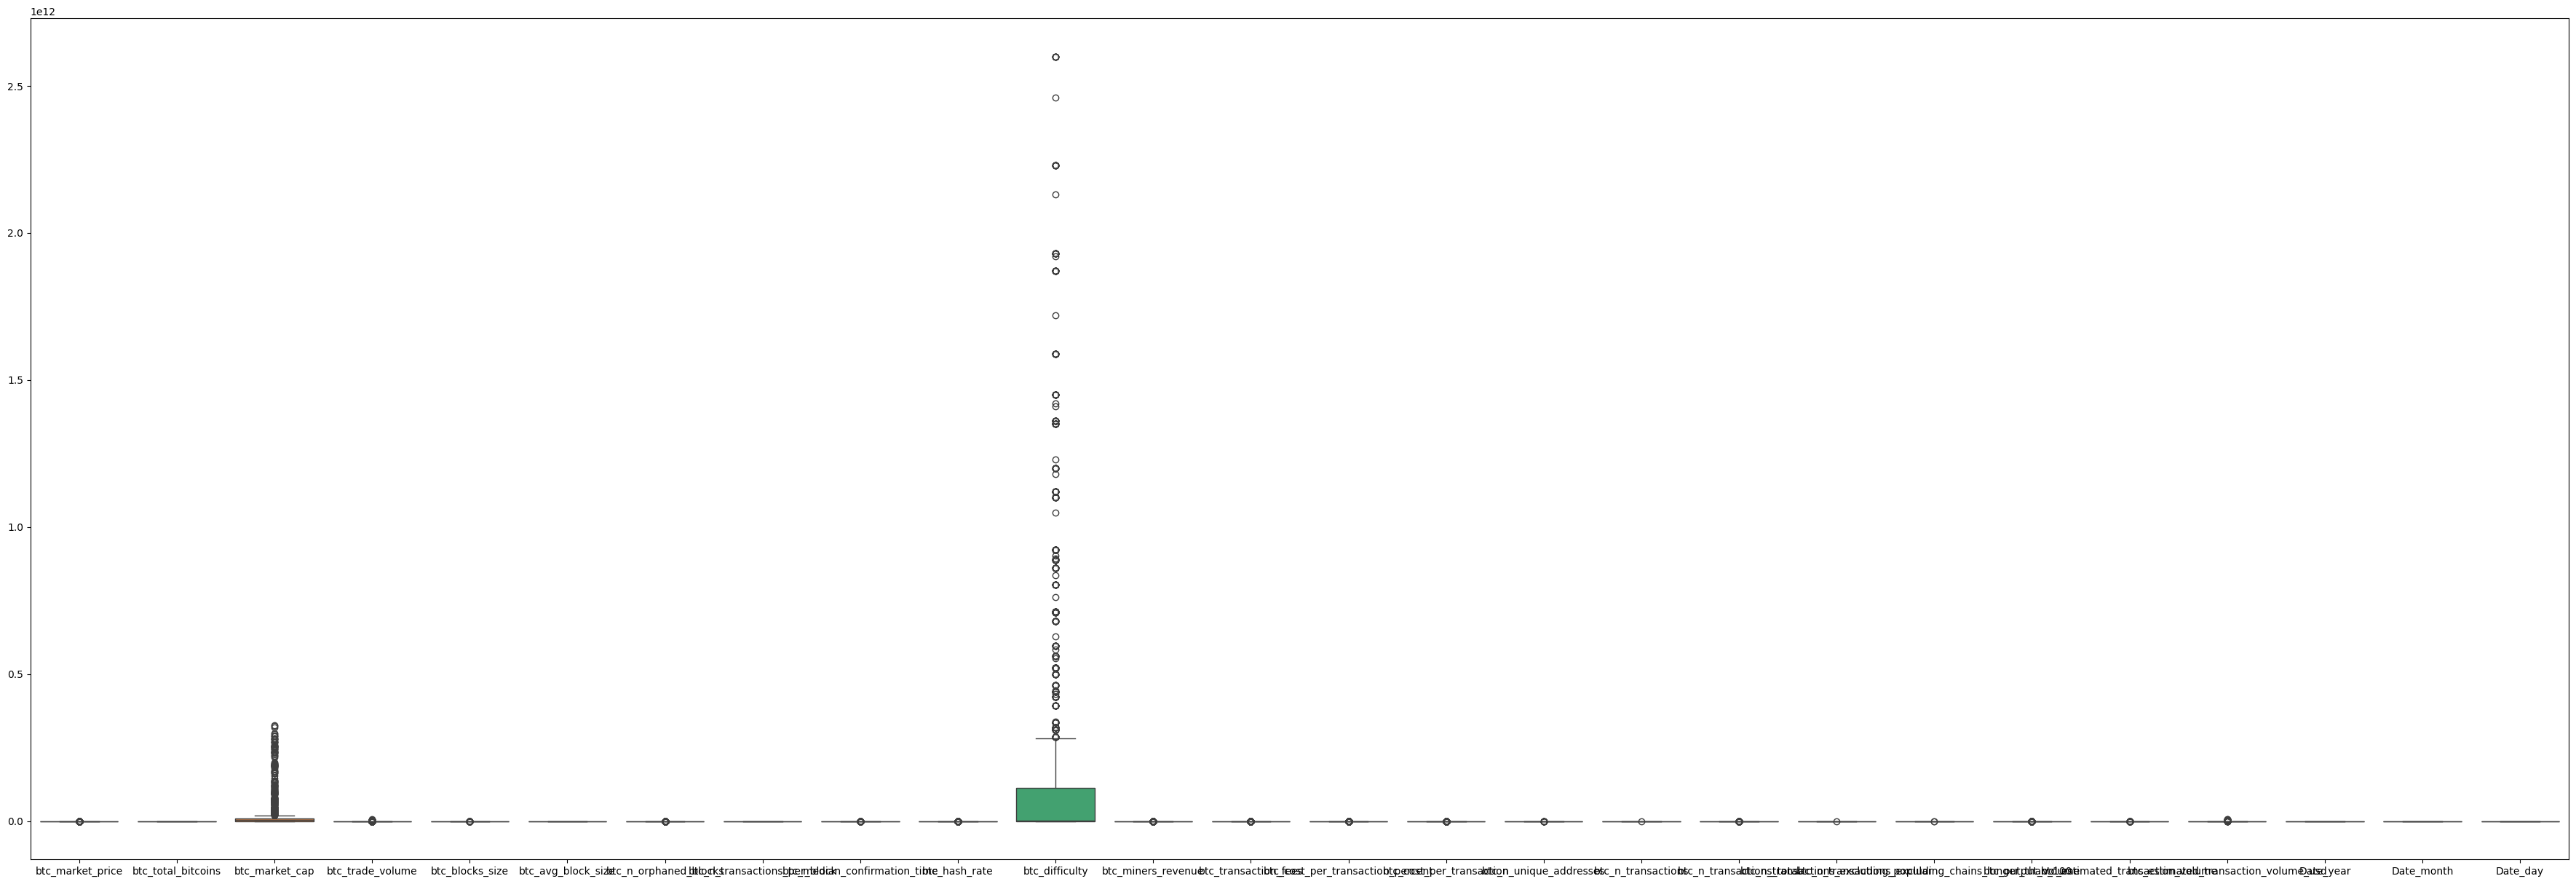

In [15]:
# check outliers
plt.figure(figsize=(45,15))
sns.boxplot(df)

In [16]:
# 'btc_market_cap' ,'btc_difficulty'
q1=df['btc_market_cap'].quantile(0.25)
q3=df['btc_market_cap'].quantile(0.75)
iqr=q3-q1
lower_fence=q1-1.5*iqr
upper_fence=q3+1.5*iqr
df=df[(df['btc_market_cap']>=lower_fence) & (df['btc_market_cap']<upper_fence)]

In [17]:
q1_dif=df['btc_difficulty'].quantile(0.25)
q3_dif=df['btc_difficulty'].quantile(0.75)
iqr_dif=q3_dif-q1_dif
lower_fence_dif=q1_dif-1.5*iqr_dif
upper_fence_dif=q3_dif+1.5*iqr_dif
df=df[(df['btc_difficulty']>=lower_fence_dif) & (df['btc_difficulty']<upper_fence_dif)]

<Axes: >

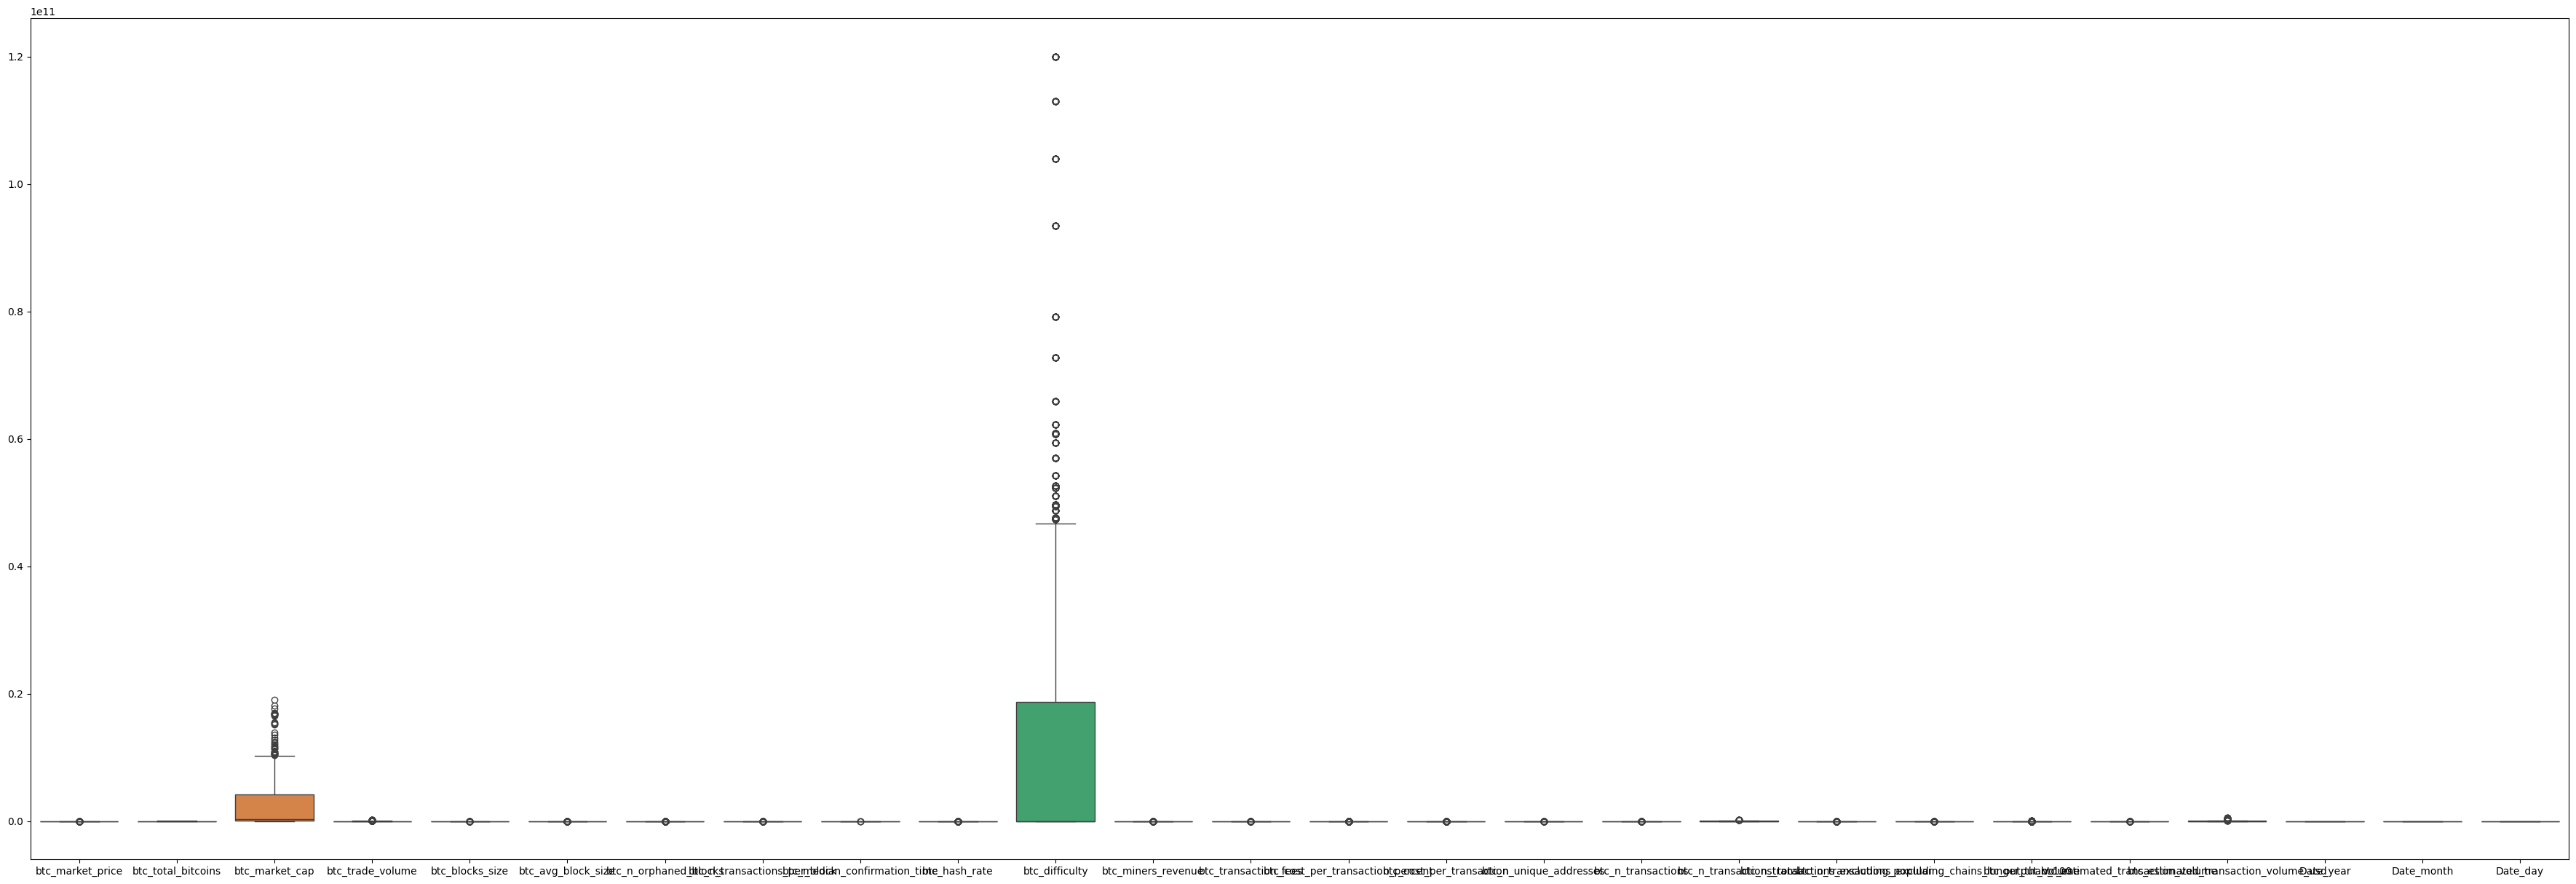

In [18]:
plt.figure(figsize=(45,15))
sns.boxplot(df)

In [19]:
x=df.drop('btc_market_price',axis=1)
y=df['btc_market_price']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
# scale data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [22]:
# LinearRegression
lr=LinearRegression()
lr.fit(x_train_scaled,y_train)
predict=lr.predict(x_test_scaled)
accuracy_lr=r2_score(y_test,predict)
print('accuracy_lr:  ',accuracy_lr)

accuracy_lr:   0.999454433411589


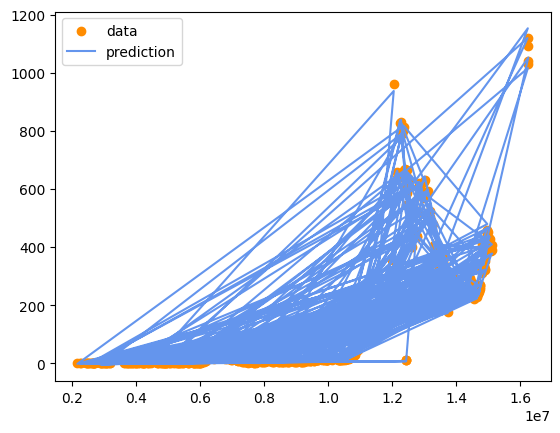

In [23]:
# plot the predicted values against the true values
plt.scatter(x_test.iloc[:, 0], y_test, color='darkorange',
            label='data')
plt.plot(x_test.iloc[:, 0], predict, color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()

In [24]:
# SVR
svr=SVR(kernel='rbf',gamma='scale',C=100)
svr.fit(x_train_scaled,y_train)
predict_svr=svr.predict(x_test_scaled)
accuracy_svr=r2_score(y_test,predict_svr)
print('accuracy_svr:  ',accuracy_svr)

accuracy_svr:   0.9949259905184692


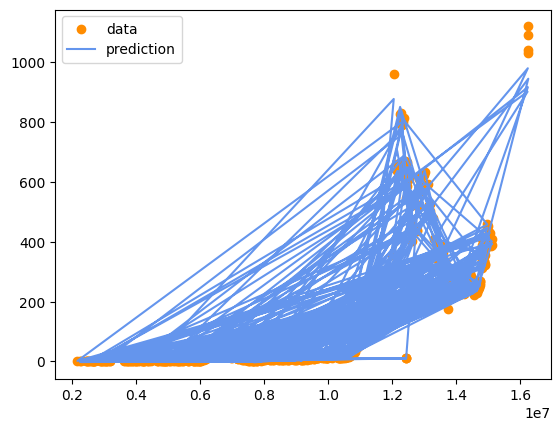

In [25]:
# plot the predicted values against the true values
plt.scatter(x_test.iloc[:, 0], y_test, color='darkorange',
            label='data')
plt.plot(x_test.iloc[:, 0], predict_svr, color='cornflowerblue',
         label='prediction')
plt.legend()
plt.show()